In [1]:
# !pip install synapseclient
#!pip install --upgrade synapseclient

In [2]:
#import synapseclient

In [3]:
#syn = synapseclient.Synapse()
#syn.login('nikos73@gmail.com','#########')

In [4]:
#import synapseutils

In [5]:
#files = synapseutils.syncFromSynapse(syn, 'syn5759470')

In [6]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline
import seaborn as sns
import sklearn
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
def summaryOfDataFrame(*args):
    '''to get summary of dataframes'''
    for arg in args:
        print (arg.head())
        print ({"shape": arg.shape, "sum of means":sum(arg.mean(axis=0)==0)})

In [8]:
PrIn =  pd.read_csv("MSBB_Proteomics_PFC_proteininput.csv")

In [9]:
PrTr =  pd.read_csv("MSBB_Proteomics_PFC_traits.network.csv")
print (PrTr.shape)
PrTr.dropna(inplace=True)
# print (PrTr.shape)
# display (PrTr.head(20))
# display (PrTr.tail(20))
TraitsDescription = {"RunName":"File name", "CaseID*":"Sample ID",
                     "BB#*":"Individual ID", "PMI":"Post mortem interval",
                     "DxByPath":{0:"normal", 1:"possible AD", 2:"probable AD", 3:"definite AD"}, 
                     "CDR":"Clinical dementia rating", "SEX":{0:"female", 1:"male"},
                     "NP1": "Neuropathology category", 
                     "PlaqueMean": "Mean neocortical plaque density across 5 regions (# of plaques/mm2)",
                     "MFG":"Undefined", "STG":"Undefined",
                     "Batch": "Processing batch", "AOD":"Age of death"}
# print (TraitsDescription.items())
PrTr2 =PrTr[["RunName", "CDR", "PlaqueMean"]] # keep only the "meaningful" features
print (PrTr2.shape)
# display (PrTr2.head(20))
# display (PrTr2.tail(20))

(306, 14)
(262, 3)


## Reformatting and cleaning the data

In [10]:
PrIn2 =PrIn.T # reverse the protein list to use different proteins as features
# display(PrIn2.head())
# PrIn2.shape

In [11]:
PrIn2.columns = PrIn2.iloc[0, :] # use the first row as labels 
# PrIn2.columns.name = None # remove the name 

In [12]:
PrIn3 = PrIn2.iloc[1:, :]
# PrIn3.columns.name =None
RunName = PrIn3.index
PrIn3.index=range(PrIn3.shape[0])
PrIn3["RunName"] = RunName
# print (PrIn3.shape)
# display(PrIn3.head())
# display( PrIn3.tail())
PrIn5 = PrIn3.dropna(axis=1, how= "any")# drop all values that we were not able to detect
# print (PrIn5.shape)
PrIn4 =PrIn3.fillna(value =1) #perhaps we do not detect them as they are below detection
# display (PrIn4.head())
# print (PrIn4.shape)
# (summaryOfDataFrame(PrIn4, PrIn5)) #checking structure

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
PrIn4b = PrIn4.merge(PrTr2, how="inner") #merge with key of traits
# display(PrIn4b.head())
# print (PrIn4b.shape)
PrIn5b = PrIn5.merge(PrTr2, how ="inner") #merge with key of traits
# display(PrIn5b.head())
# print (PrIn5b.shape)
# (summaryOfDataFrame(PrIn4b, PrIn5b)) # checking structure
print ((PrIn4b.dtypes=="float64").sum(), (PrIn5b.dtypes=="float64").sum())
# np.array(PrIn5b.iloc[:, :1553]).reshape(1,-1)
A = (np.array(PrIn5b.iloc[:, :1553]).reshape(-1,1)).reshape(262, 1553)
PrIn5b.iloc[:, :1553] = A
print ((PrIn4b.dtypes=="float64").sum(), (PrIn5b.dtypes=="float64").sum())
display(PrIn5b.head())

3417 2
3417 1555


,MBP|P02686,GFAP|P14136,TUBA1B|P68363,ACTG1|P63261,HBB|P68871,HBA2|P69905,GAPDH|P04406,TUBB2B|Q9BVA1,DPYSL2|Q16555,SPTAN1|Q13813-2,...,ARHGAP44|Q17R89-3,AK2|F8W1A4,MT-ND4|P03905,EXOC6B|Q9Y2D4,ABCD3|P28288,FNTA|P49354,ABETA|,RunName,CDR,PlaqueMean
0,1.576100e+11,2.314700e+11,1.831600e+11,1.825000e+11,1.677700e+11,1.420500e+11,1.110900e+11,1.210400e+11,1.327500e+11,1.248900e+11,...,165530000.0,91624000.0,158590000.0,73012000.0,95210000.0,46573000.0,2.149854e+09,b1_03_1601,3.0,5.92
1,1.187500e+11,3.483000e+11,1.736500e+11,1.606600e+11,1.935100e+11,1.541300e+11,1.345000e+11,1.154900e+11,1.257600e+11,1.252000e+11,...,128650000.0,201990000.0,232920000.0,81951000.0,99131000.0,79325000.0,2.305162e+09,b1_04_1745,5.0,9.68
2,1.969300e+11,2.231600e+11,1.891300e+11,1.855100e+11,1.276400e+11,1.152100e+11,1.276700e+11,1.241200e+11,1.320300e+11,1.221300e+11,...,171830000.0,95068000.0,155740000.0,75716000.0,90215000.0,35273000.0,2.248157e+09,b1_05_1679,2.0,20.96
3,1.782900e+11,2.067100e+11,1.989100e+11,1.872800e+11,1.255800e+11,1.049900e+11,1.267300e+11,1.402800e+11,1.327100e+11,1.200600e+11,...,140420000.0,88573000.0,118270000.0,42806000.0,90218000.0,16622000.0,2.684192e+09,b1_06_1622,2.0,4.73
4,1.398700e+11,2.334100e+11,2.082400e+11,1.739400e+11,8.347300e+10,5.964200e+10,1.201700e+11,1.236100e+11,1.199200e+11,1.211900e+11,...,199520000.0,141130000.0,139420000.0,109720000.0,122370000.0,54951000.0,2.233925e+09,b1_07_1515,4.0,29.12


## Exploratory analysis
### Clinical Dementia relates to mean size of plaques in the brain

In [14]:
from sklearn.linear_model import LinearRegression
modelCDRtoPlaques = LinearRegression()
modelCDRtoPlaques.fit(PrIn4b["CDR"].reshape(-1, 1), PrIn4b["PlaqueMean"])
print (modelCDRtoPlaques.coef_, modelCDRtoPlaques.intercept_)

[2.2733209] 3.1937155968914688


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


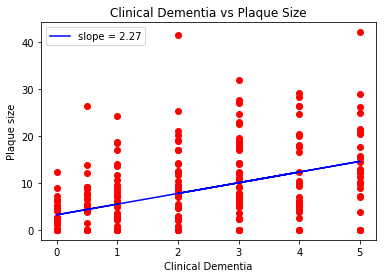

In [15]:
fig = plt.figure()
plt.scatter(PrIn5b.CDR, PrIn5b.PlaqueMean, c="r")
plt.title ("Clinical Dementia vs Plaque Size")
abline = [modelCDRtoPlaques.coef_ * i + modelCDRtoPlaques.intercept_ for i in PrIn5b.CDR.unique()]
# print (abline)
plt.plot(PrIn5b.CDR.unique(), abline, c="b")
plt.legend(["slope = 2.27"], loc = "best")
plt.xlabel("Clinical Dementia")
plt.ylabel("Plaque size")
plt.savefig("fig1")

### Should we scale?

In [16]:
def plot_and_compare(df, x):
    df2 = df.T
    df3 = df.iloc[:,:].apply(np.log10).T
    display (df.head(), df2.head(), df3.head())
    plt.figure(figsize=(30, 30))
    plt.subplot(121)
    plt.violinplot(df2.iloc[:, :])
    plt.xlabel("Genes")
    plt.title("Raw Counts")
    plt.subplot(122)
    plt.violinplot(df3.iloc[:, :])
    plt.xlabel("Genes")
    plt.title("log10 Raw Counts")
    plt.savefig("fig" + str(x))

,MBP|P02686,GFAP|P14136,TUBA1B|P68363,ACTG1|P63261,HBB|P68871,HBA2|P69905,GAPDH|P04406,TUBB2B|Q9BVA1,DPYSL2|Q16555,SPTAN1|Q13813-2,...,KIAA1244|Q5TH69,HIGD1A|C9JAW5,SURF4|O15260-2,ARHGAP44|Q17R89-3,AK2|F8W1A4,MT-ND4|P03905,EXOC6B|Q9Y2D4,ABCD3|P28288,FNTA|P49354,ABETA|
0,1.576100e+11,2.314700e+11,1.831600e+11,1.825000e+11,1.677700e+11,1.420500e+11,1.110900e+11,1.210400e+11,1.327500e+11,1.248900e+11,...,142780000.0,131320000.0,104130000.0,165530000.0,91624000.0,158590000.0,73012000.0,95210000.0,46573000.0,2.149854e+09
1,1.187500e+11,3.483000e+11,1.736500e+11,1.606600e+11,1.935100e+11,1.541300e+11,1.345000e+11,1.154900e+11,1.257600e+11,1.252000e+11,...,147780000.0,114990000.0,143950000.0,128650000.0,201990000.0,232920000.0,81951000.0,99131000.0,79325000.0,2.305162e+09
2,1.969300e+11,2.231600e+11,1.891300e+11,1.855100e+11,1.276400e+11,1.152100e+11,1.276700e+11,1.241200e+11,1.320300e+11,1.221300e+11,...,104140000.0,115940000.0,105460000.0,171830000.0,95068000.0,155740000.0,75716000.0,90215000.0,35273000.0,2.248157e+09
3,1.782900e+11,2.067100e+11,1.989100e+11,1.872800e+11,1.255800e+11,1.049900e+11,1.267300e+11,1.402800e+11,1.327100e+11,1.200600e+11,...,125620000.0,139990000.0,55246000.0,140420000.0,88573000.0,118270000.0,42806000.0,90218000.0,16622000.0,2.684192e+09
4,1.398700e+11,2.334100e+11,2.082400e+11,1.739400e+11,8.347300e+10,5.964200e+10,1.201700e+11,1.236100e+11,1.199200e+11,1.211900e+11,...,130250000.0,150500000.0,75655000.0,199520000.0,141130000.0,139420000.0,109720000.0,122370000.0,54951000.0,2.233925e+09


,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
MBP|P02686,1.576100e+11,1.187500e+11,1.969300e+11,1.782900e+11,1.398700e+11,1.760400e+11,1.388000e+11,1.718100e+11,2.698400e+11,1.932600e+11,...,1.773300e+11,1.785400e+11,1.738000e+11,1.864100e+11,4.876000e+11,1.513800e+11,1.227900e+11,1.592600e+11,1.352100e+11,2.196300e+11
GFAP|P14136,2.314700e+11,3.483000e+11,2.231600e+11,2.067100e+11,2.334100e+11,2.363900e+11,1.748000e+11,2.901200e+11,1.971400e+11,2.158600e+11,...,9.636300e+10,1.268300e+11,1.229300e+11,7.799600e+10,4.208900e+11,1.074600e+11,9.399000e+10,1.294900e+11,1.367800e+11,9.864500e+10
TUBA1B|P68363,1.831600e+11,1.736500e+11,1.891300e+11,1.989100e+11,2.082400e+11,2.271200e+11,1.714300e+11,1.909000e+11,2.074800e+11,2.163300e+11,...,8.067100e+10,1.006200e+11,1.039500e+11,1.111600e+11,1.285200e+11,8.520400e+10,9.344200e+10,1.160000e+11,7.923300e+10,9.721800e+10
ACTG1|P63261,1.825000e+11,1.606600e+11,1.855100e+11,1.872800e+11,1.739400e+11,1.993800e+11,1.499900e+11,1.708900e+11,1.851500e+11,1.840400e+11,...,1.003300e+11,1.288100e+11,1.240000e+11,1.317600e+11,1.252500e+11,8.866400e+10,1.030000e+11,1.286600e+11,9.403400e+10,1.171200e+11
HBB|P68871,1.677700e+11,1.935100e+11,1.276400e+11,1.255800e+11,8.347300e+10,1.405500e+11,1.311500e+11,8.918800e+10,2.650500e+11,9.235500e+10,...,9.006600e+10,9.939400e+10,6.152000e+10,1.291400e+11,1.705700e+11,5.713200e+10,6.124000e+10,8.427100e+10,1.447400e+11,9.838900e+10


,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
MBP|P02686,11.197584,11.074634,11.294312,11.251127,11.145725,11.245611,11.142389,11.235048,11.431106,11.286142,...,11.248782,11.251736,11.240050,11.270469,11.688064,11.180069,11.089163,11.202107,11.131009,11.341692
GFAP|P14136,11.364495,11.541953,11.348616,11.315361,11.368119,11.373629,11.242541,11.462578,11.294775,11.334172,...,10.983910,11.103222,11.089658,10.892072,11.624169,11.031247,10.973082,11.112236,11.136023,10.994075
TUBA1B|P68363,11.262831,11.239675,11.276760,11.298657,11.318564,11.356255,11.234087,11.280806,11.316976,11.335117,...,10.906717,11.002684,11.016824,11.045949,11.108971,10.930460,10.970542,11.064458,10.898906,10.987747
ACTG1|P63261,11.261263,11.205908,11.268367,11.272491,11.240399,11.299682,11.176062,11.232717,11.267524,11.264912,...,11.001431,11.109950,11.093422,11.119784,11.097778,10.947747,11.012837,11.109444,10.973285,11.068631
HBB|P68871,11.224714,11.286703,11.105987,11.098920,10.921546,11.147831,11.117768,10.950306,11.423328,10.965460,...,10.954561,10.997360,10.789016,11.111061,11.231903,10.756879,10.787035,10.925678,11.160589,10.992947


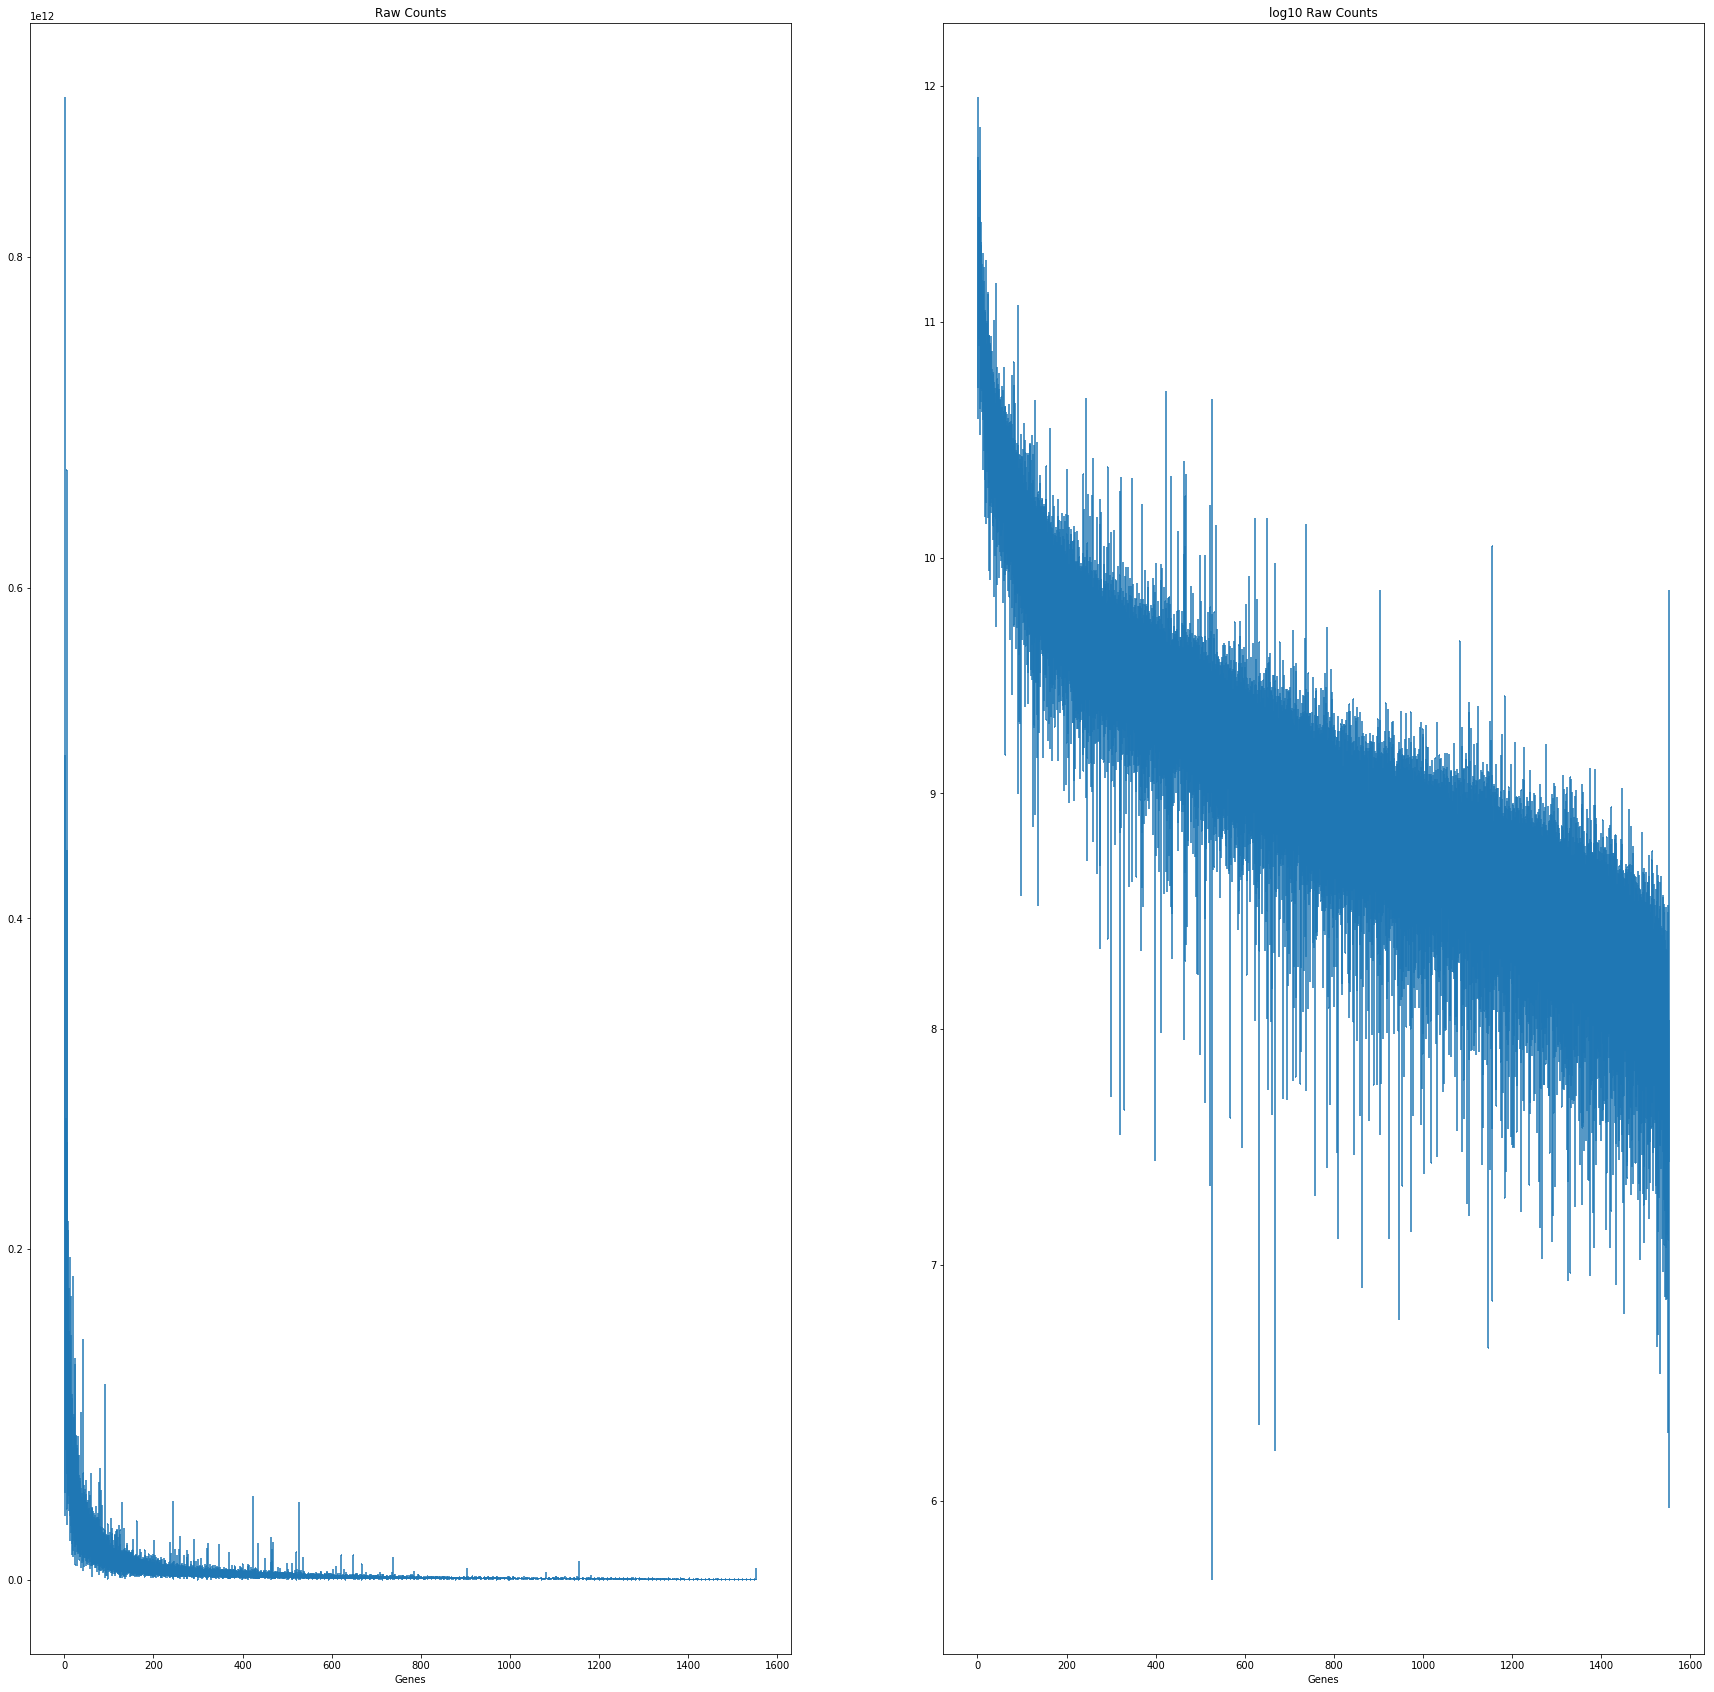

In [17]:
plot_and_compare(PrIn5b.drop(["RunName", "CDR", "PlaqueMean"], axis =1), 2 )

,MBP|P02686,GFAP|P14136,TUBA1B|P68363,ACTG1|P63261,HBB|P68871,HBA2|P69905,GAPDH|P04406,TUBB2B|Q9BVA1,DPYSL2|Q16555,SPTAN1|Q13813-2,...,RWDD1|E5RGQ3,EPN3|D6RFG3,SLC35B4|Q969S0-2,MRPL49|Q13405,VKORC1L1|Q8N0U8,PTPMT1|Q8WUK0-2,PGPEP1|Q9NXJ5-2,LAGE3|Q14657,HAX1|O00165-5,ABETA|
0,1.576100e+11,2.314700e+11,1.831600e+11,1.825000e+11,1.677700e+11,1.420500e+11,1.110900e+11,1.210400e+11,1.327500e+11,1.248900e+11,...,1.0,1.0,3630100.0,9994800.0,5977100.0,1.0,1.0,13813000.0,7490000.0,2.149854e+09
1,1.187500e+11,3.483000e+11,1.736500e+11,1.606600e+11,1.935100e+11,1.541300e+11,1.345000e+11,1.154900e+11,1.257600e+11,1.252000e+11,...,7770500.0,1.0,12875000.0,7537400.0,9658300.0,14575000.0,1.0,12529000.0,1.0,2.305162e+09
2,1.969300e+11,2.231600e+11,1.891300e+11,1.855100e+11,1.276400e+11,1.152100e+11,1.276700e+11,1.241200e+11,1.320300e+11,1.221300e+11,...,9130500.0,1.0,4972300.0,1.0,1.0,1.0,1.0,13225000.0,6890400.0,2.248157e+09
3,1.782900e+11,2.067100e+11,1.989100e+11,1.872800e+11,1.255800e+11,1.049900e+11,1.267300e+11,1.402800e+11,1.327100e+11,1.200600e+11,...,10021000.0,1.0,12281000.0,1.0,1.0,5018200.0,1.0,7099400.0,1.0,2.684192e+09
4,1.398700e+11,2.334100e+11,2.082400e+11,1.739400e+11,8.347300e+10,5.964200e+10,1.201700e+11,1.236100e+11,1.199200e+11,1.211900e+11,...,1.0,4528800.0,8001800.0,1.0,1.0,10009000.0,15759000.0,8352600.0,7242900.0,2.233925e+09


,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
MBP|P02686,1.576100e+11,1.187500e+11,1.969300e+11,1.782900e+11,1.398700e+11,1.760400e+11,1.388000e+11,1.718100e+11,2.698400e+11,1.932600e+11,...,1.773300e+11,1.785400e+11,1.738000e+11,1.864100e+11,4.876000e+11,1.513800e+11,1.227900e+11,1.592600e+11,1.352100e+11,2.196300e+11
GFAP|P14136,2.314700e+11,3.483000e+11,2.231600e+11,2.067100e+11,2.334100e+11,2.363900e+11,1.748000e+11,2.901200e+11,1.971400e+11,2.158600e+11,...,9.636300e+10,1.268300e+11,1.229300e+11,7.799600e+10,4.208900e+11,1.074600e+11,9.399000e+10,1.294900e+11,1.367800e+11,9.864500e+10
TUBA1B|P68363,1.831600e+11,1.736500e+11,1.891300e+11,1.989100e+11,2.082400e+11,2.271200e+11,1.714300e+11,1.909000e+11,2.074800e+11,2.163300e+11,...,8.067100e+10,1.006200e+11,1.039500e+11,1.111600e+11,1.285200e+11,8.520400e+10,9.344200e+10,1.160000e+11,7.923300e+10,9.721800e+10
ACTG1|P63261,1.825000e+11,1.606600e+11,1.855100e+11,1.872800e+11,1.739400e+11,1.993800e+11,1.499900e+11,1.708900e+11,1.851500e+11,1.840400e+11,...,1.003300e+11,1.288100e+11,1.240000e+11,1.317600e+11,1.252500e+11,8.866400e+10,1.030000e+11,1.286600e+11,9.403400e+10,1.171200e+11
HBB|P68871,1.677700e+11,1.935100e+11,1.276400e+11,1.255800e+11,8.347300e+10,1.405500e+11,1.311500e+11,8.918800e+10,2.650500e+11,9.235500e+10,...,9.006600e+10,9.939400e+10,6.152000e+10,1.291400e+11,1.705700e+11,5.713200e+10,6.124000e+10,8.427100e+10,1.447400e+11,9.838900e+10


,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
MBP|P02686,11.197584,11.074634,11.294312,11.251127,11.145725,11.245611,11.142389,11.235048,11.431106,11.286142,...,11.248782,11.251736,11.240050,11.270469,11.688064,11.180069,11.089163,11.202107,11.131009,11.341692
GFAP|P14136,11.364495,11.541953,11.348616,11.315361,11.368119,11.373629,11.242541,11.462578,11.294775,11.334172,...,10.983910,11.103222,11.089658,10.892072,11.624169,11.031247,10.973082,11.112236,11.136023,10.994075
TUBA1B|P68363,11.262831,11.239675,11.276760,11.298657,11.318564,11.356255,11.234087,11.280806,11.316976,11.335117,...,10.906717,11.002684,11.016824,11.045949,11.108971,10.930460,10.970542,11.064458,10.898906,10.987747
ACTG1|P63261,11.261263,11.205908,11.268367,11.272491,11.240399,11.299682,11.176062,11.232717,11.267524,11.264912,...,11.001431,11.109950,11.093422,11.119784,11.097778,10.947747,11.012837,11.109444,10.973285,11.068631
HBB|P68871,11.224714,11.286703,11.105987,11.098920,10.921546,11.147831,11.117768,10.950306,11.423328,10.965460,...,10.954561,10.997360,10.789016,11.111061,11.231903,10.756879,10.787035,10.925678,11.160589,10.992947


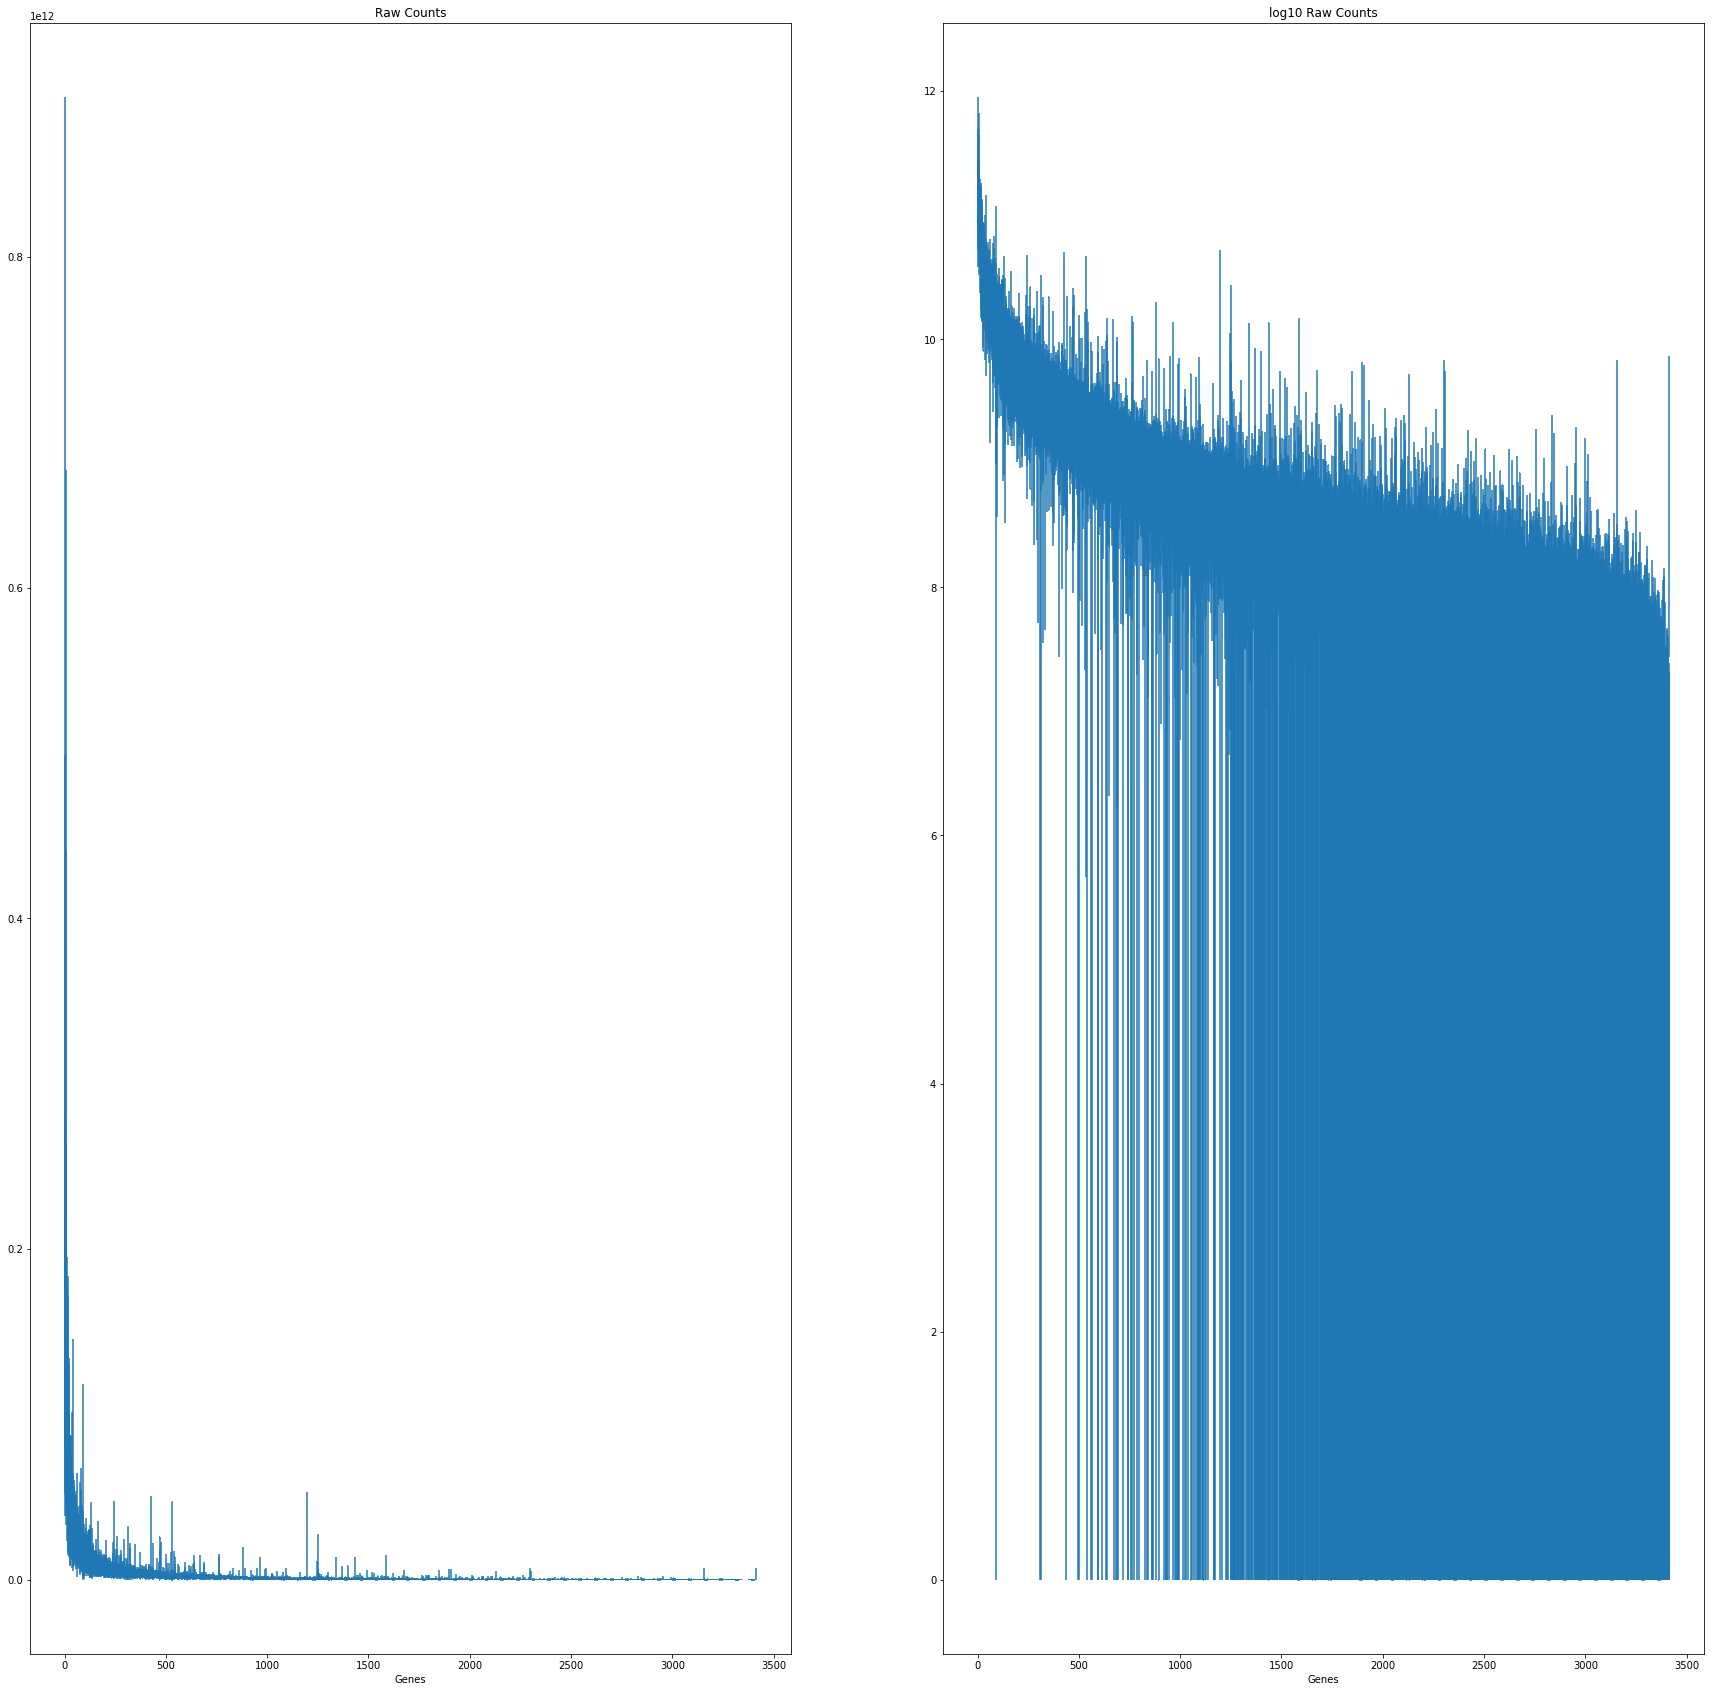

In [18]:
plot_and_compare(PrIn4b.drop(["RunName", "CDR", "PlaqueMean"], axis =1), 3 )

## Preprocessing (standard scaling) - Linear regression model based on plaque size

In [19]:
def linearmodel(Xa, y, engineer, scale):
    from sklearn.cross_validation import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    if engineer == True:
        Xa = Xa.iloc[:,:].apply(np.log10)
    else:
        Xa = Xa
    if scale == True:
        X=StandardScaler().fit_transform(Xa)
    else:
        X =Xa
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=1)
#     print (X_train.shape,  X_test.shape, y_train.shape, y_test.shape)
#     print (Xa.columns, y.name)
    
    lm =LinearRegression()
    lm2 = lm.fit(X_train,y_train)
    y_pred = lm2.predict(X_test)
    return lm2.coef_, lm2.intercept_, lm2.score(X_test, y_test)

In [20]:
# linear regression against plaque size
from itertools import permutations, combinations
A = [False, True, False, True]
a = set(list(permutations(A, 2)))
df = [PrIn4b, PrIn5b]
best_model = 0
D =pd.DataFrame()
for i in a:
    for d in df:
        model = linearmodel(Xa = d.iloc[:, :-3], y = d.iloc[:, -1], engineer = i[0], scale = i[1])
        if model[2]>best_model:
            best_model = model[2]
            D = d
            
print (best_model, D.shape, "engineer", i[0], "scale", i[1])
        

0.3197051538093847 (262, 1556) engineer True scale True


In [21]:
# linear regression against CDR
from itertools import permutations, combinations
A = [False, True, False, True]
a = set(list(permutations(A, 2)))
df = [PrIn4b, PrIn5b]
best_model = 0
D =pd.DataFrame()
for i in a:
    for d in df:
        model = linearmodel(Xa = d.iloc[:, :-3], y = d.iloc[:, -2], engineer = i[0], scale = i[1])
        if model[2]>best_model:
            best_model = model[2]
            D = d
            
print (best_model, D.shape, "engineer", i[0], "scale", i[1])

0.3008927333978455 (262, 3418) engineer True scale True


## Find important genes

In [22]:
model = linearmodel(Xa = PrIn5b.iloc[:, :-3], y = PrIn5b.iloc[:, -1], engineer = True, scale =True)
WeightOfGenes = pd.DataFrame({"coefficients":model[0]}, index = PrIn5b.iloc[:, :-3].columns.tolist())
# print (WeightOfGenes)
# print (type(WeightOfGenes.coefficients))
# plt.scatter(WeightOfGenes.index, WeightOfGenes.coefficients)
(WeightOfGenes.coefficients).describe(percentiles =[0.025, 0.975])

count    1553.000000
mean        0.002065
std         0.175938
min        -0.728611
2.5%       -0.334923
50%        -0.000378
97.5%       0.360333
max         1.819556
Name: coefficients, dtype: float64

In [23]:
def threshold(a,b, A):
    '''find the minimum of the percentiles a, b in a Series'''
    x =  np.array(abs(A.describe(percentiles=[a, b]).coefficients[[4,6]]))
    return round(x.mean(),2)
thr = (threshold(0.025, 0.975, WeightOfGenes))
print (thr)
AD_genes = WeightOfGenes[abs(WeightOfGenes.coefficients) >= (thr)]
AD_genes2 = AD_genes.sort_values(by ="coefficients")
AD={}
for i in AD_genes2.index:
    AD[i] = AD_genes2.loc[i, "coefficients"]
print (AD, "\n", len (AD.keys()))

0.35
{'CUL4B|Q13620-1': -0.7286109221806115, 'BSG|P35613-2': -0.6538015367874209, 'ATP5J2-PTCD1|G3V325': -0.6232159402526478, 'FECH|P22830': -0.5714154476158964, 'TUBB2A|Q13885': -0.5577032403247383, 'ATP1B3|P54709': -0.5314327597803082, 'ACO1|P21399': -0.5229705362273506, 'RAB21|Q9UL25': -0.5109563978482792, 'NBEA|Q5T321': -0.500503088973904, 'SRGAP2|B7ZM87': -0.48121603543464797, 'RABEP1|Q15276': -0.45713068612676394, 'SUCLG1|P53597': -0.4419292819860843, 'CASK|O14936-4': -0.43730487926344075, 'USP9X|Q93008-1': -0.413669800919726, 'PROSC|O94903': -0.4134590262774526, 'ANXA2|P07355': -0.4048596585758274, 'DUSP3|P51452': -0.39454308984009767, 'PGLS|O95336': -0.3898109296526186, 'CDH13|P55290-4': -0.3865628411930133, 'HSD17B12|Q53GQ0': -0.3824347496523182, 'ADAM23|E7EWD3': -0.3754019692280128, 'ATCAY|Q86WG3': -0.3741157046112146, 'RPS20|P60866': -0.3711616235740278, 'AK3|Q9UIJ7': -0.3707216203868122, 'GOT1|P17174': -0.36547314997834873, 'S100B|P04271': -0.36108869954205347, 'ANXA1|P0408

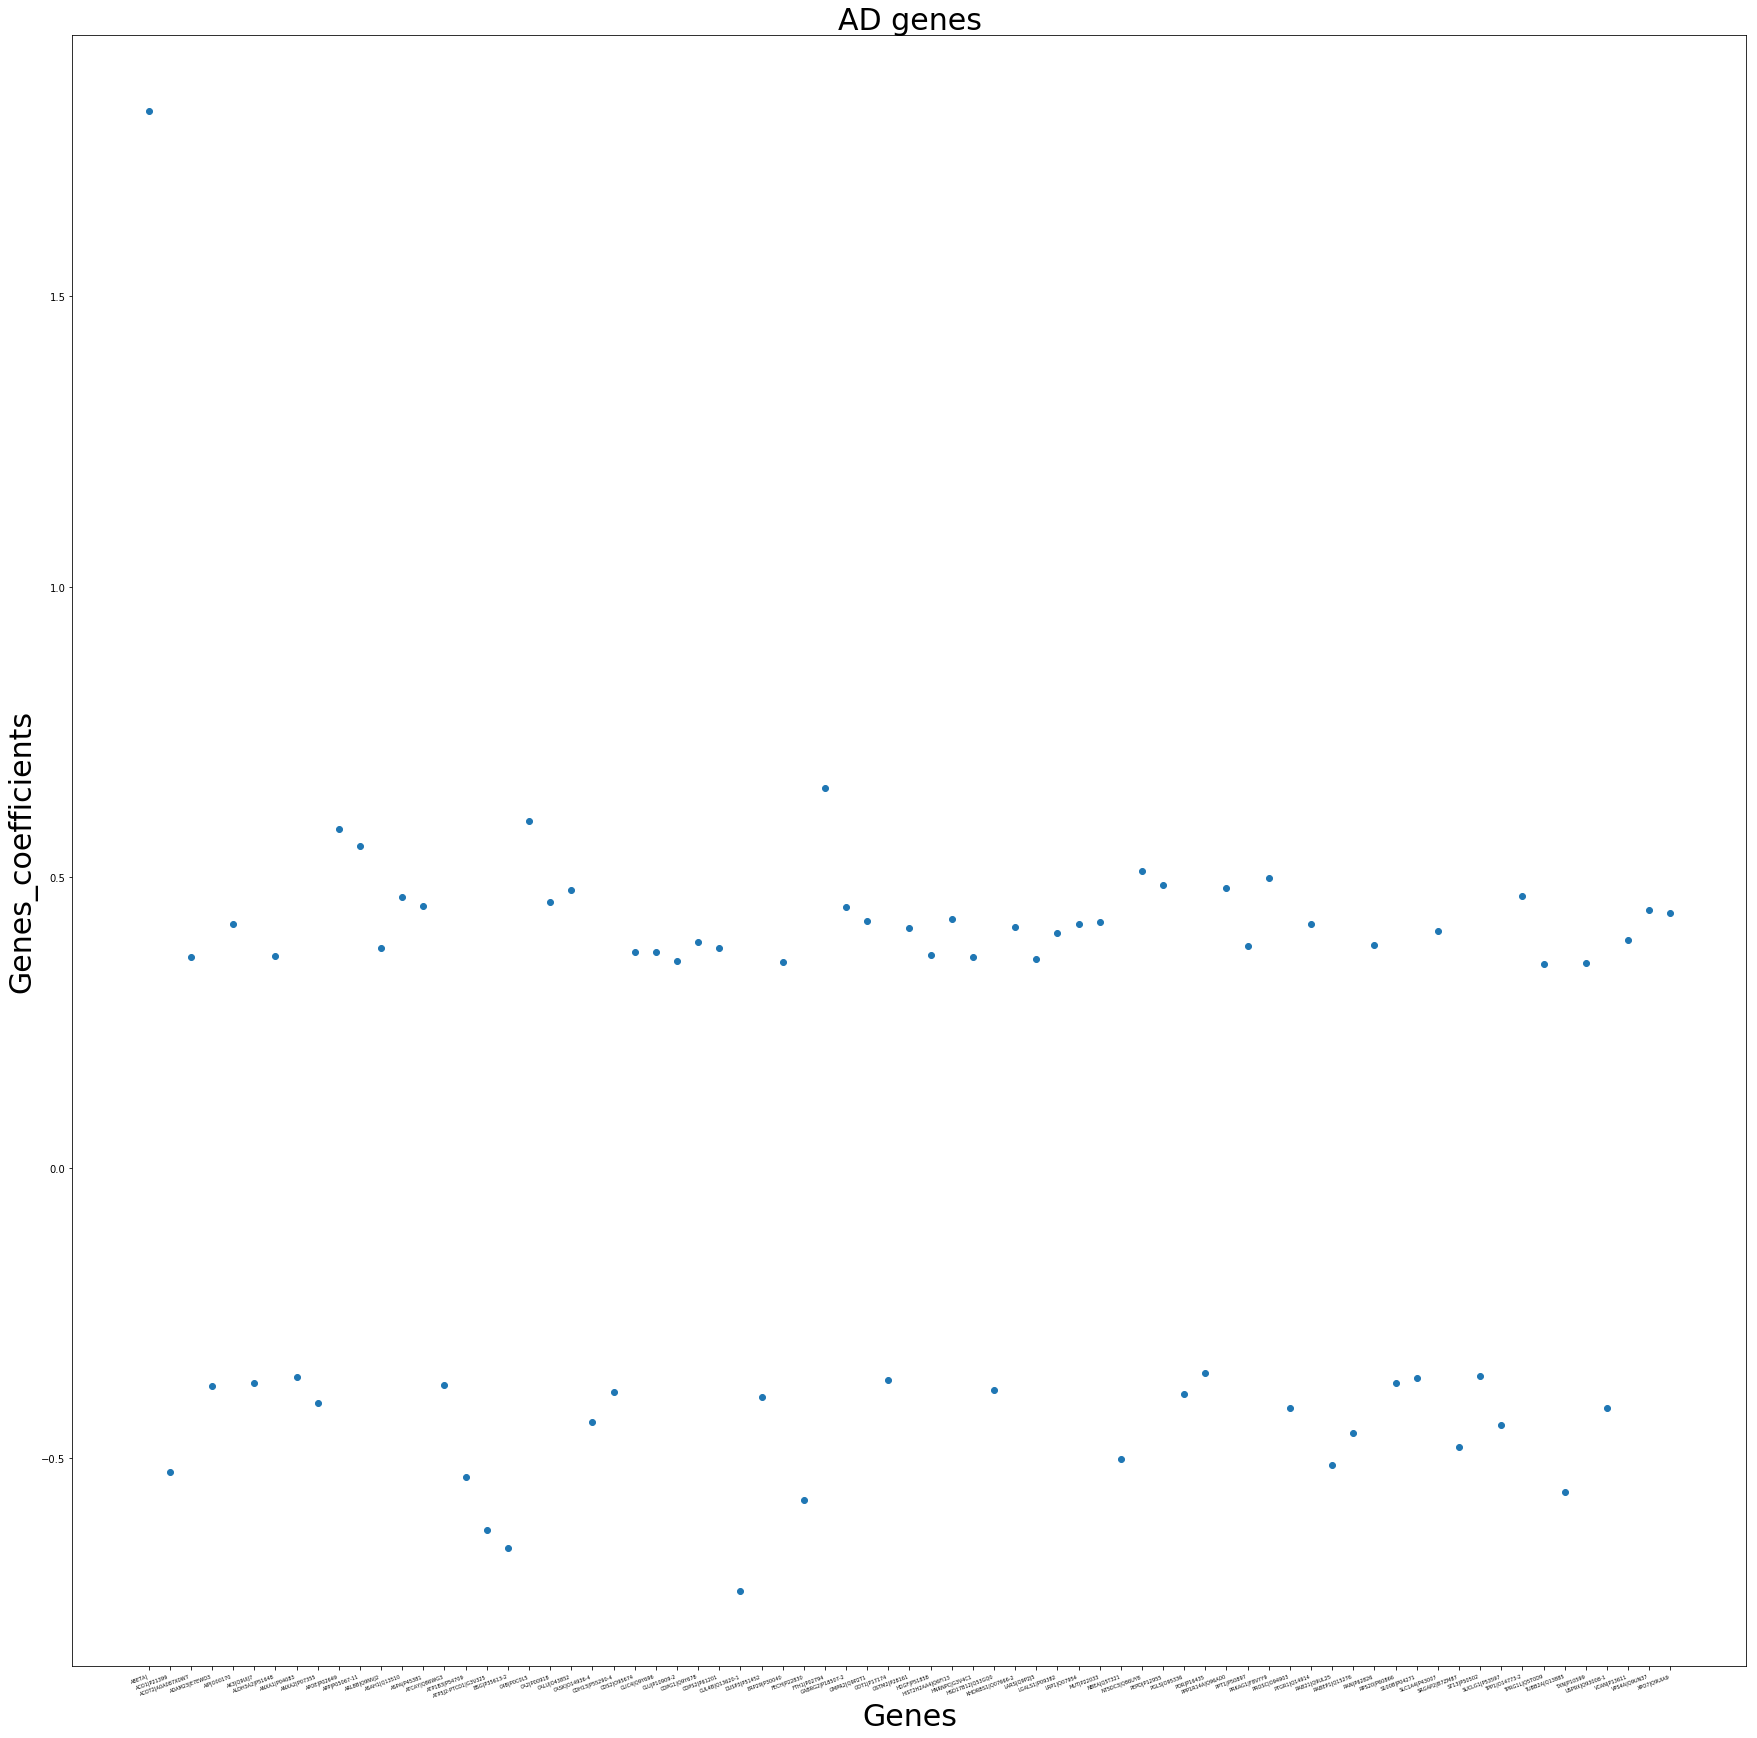

In [24]:
plt.figure(figsize =(30, 30))
plt.xticks(rotation='20', fontsize='5', color='black', ha='right')
plt.xlabel('Genes', fontsize ='30')
plt.ylabel('Genes_coefficients', fontsize ='30')
plt.title('AD genes', fontsize ='30')
plt.scatter(AD_genes2.index, AD_genes2.coefficients)
plt.savefig("fig4")


## Coexpression clusters

In [25]:
Xcoexpressed = (PrIn5b.iloc[:,:-3]).T # genes that are coexpressed with each other
display(Xcoexpressed.head())
clusters = list(range(2, 21))
from sklearn.cluster import KMeans
inertia =[]
for i in clusters:
    km =KMeans(i)
    km2 = km.fit(Xcoexpressed)
    inertia.append(km2.inertia_)
    print (i, km2.inertia_, len(inertia))
print (inertia)

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
MBP|P02686,1.576100e+11,1.187500e+11,1.969300e+11,1.782900e+11,1.398700e+11,1.760400e+11,1.388000e+11,1.718100e+11,2.698400e+11,1.932600e+11,...,1.773300e+11,1.785400e+11,1.738000e+11,1.864100e+11,4.876000e+11,1.513800e+11,1.227900e+11,1.592600e+11,1.352100e+11,2.196300e+11
GFAP|P14136,2.314700e+11,3.483000e+11,2.231600e+11,2.067100e+11,2.334100e+11,2.363900e+11,1.748000e+11,2.901200e+11,1.971400e+11,2.158600e+11,...,9.636300e+10,1.268300e+11,1.229300e+11,7.799600e+10,4.208900e+11,1.074600e+11,9.399000e+10,1.294900e+11,1.367800e+11,9.864500e+10
TUBA1B|P68363,1.831600e+11,1.736500e+11,1.891300e+11,1.989100e+11,2.082400e+11,2.271200e+11,1.714300e+11,1.909000e+11,2.074800e+11,2.163300e+11,...,8.067100e+10,1.006200e+11,1.039500e+11,1.111600e+11,1.285200e+11,8.520400e+10,9.344200e+10,1.160000e+11,7.923300e+10,9.721800e+10
ACTG1|P63261,1.825000e+11,1.606600e+11,1.855100e+11,1.872800e+11,1.739400e+11,1.993800e+11,1.499900e+11,1.708900e+11,1.851500e+11,1.840400e+11,...,1.003300e+11,1.288100e+11,1.240000e+11,1.317600e+11,1.252500e+11,8.866400e+10,1.030000e+11,1.286600e+11,9.403400e+10,1.171200e+11
HBB|P68871,1.677700e+11,1.935100e+11,1.276400e+11,1.255800e+11,8.347300e+10,1.405500e+11,1.311500e+11,8.918800e+10,2.650500e+11,9.235500e+10,...,9.006600e+10,9.939400e+10,6.152000e+10,1.291400e+11,1.705700e+11,5.713200e+10,6.124000e+10,8.427100e+10,1.447400e+11,9.838900e+10


2 3.89254879362148e+25 1
3 1.9758089888208603e+25 2
4 1.4366234909829168e+25 3
5 1.0352570905772563e+25 4
6 8.834751003081102e+24 5
7 7.001478803746409e+24 6
8 5.166159753182158e+24 7
9 4.180976550301157e+24 8
10 3.391644114501501e+24 9
11 2.778751639937172e+24 10
12 2.547054141379896e+24 11
13 2.2516422457642703e+24 12
14 2.1215860460150627e+24 13
15 1.8914520345177907e+24 14
16 1.7712122765921592e+24 15
17 1.6170674613438635e+24 16
18 1.4932177855191214e+24 17
19 1.3742610484514406e+24 18
20 1.323345358854456e+24 19
[3.89254879362148e+25, 1.9758089888208603e+25, 1.4366234909829168e+25, 1.0352570905772563e+25, 8.834751003081102e+24, 7.001478803746409e+24, 5.166159753182158e+24, 4.180976550301157e+24, 3.391644114501501e+24, 2.778751639937172e+24, 2.547054141379896e+24, 2.2516422457642703e+24, 2.1215860460150627e+24, 1.8914520345177907e+24, 1.7712122765921592e+24, 1.6170674613438635e+24, 1.4932177855191214e+24, 1.3742610484514406e+24, 1.323345358854456e+24]


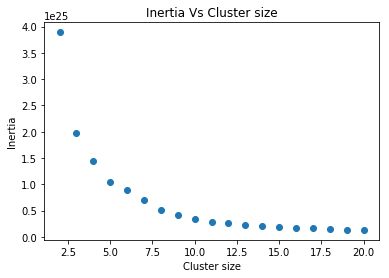

In [26]:
plt.scatter(clusters, inertia)
plt.title("Inertia Vs Cluster size")
plt.ylabel("Inertia")
plt.xlabel("Cluster size")
plt.savefig("fig5")

In [27]:
km =KMeans(10)
km2 = km.fit(Xcoexpressed)
km2.labels_

array([4, 5, 8, ..., 0, 0, 0])

In [28]:
Xnew = pd.DataFrame(Xcoexpressed)
Xnew.columns = PrIn5b.RunName
Xnew.columns.name = None
Xnew.head()

,b1_03_1601,b1_04_1745,b1_05_1679,b1_06_1622,b1_07_1515,b1_08_1595,b1_09_1754,b1_10_1583,b1_11_1674,b1_12_1542,...,b7r2_09_1732,b7r2_10_1546,b7r2_11_1504,b7r2_12_1536,b7r2_13_1520,b7r2_16_1628,b7r2_18_1655,b7r2_19_1559,b7r2_20_1638,b7r2_21_1578
MBP|P02686,1.576100e+11,1.187500e+11,1.969300e+11,1.782900e+11,1.398700e+11,1.760400e+11,1.388000e+11,1.718100e+11,2.698400e+11,1.932600e+11,...,1.773300e+11,1.785400e+11,1.738000e+11,1.864100e+11,4.876000e+11,1.513800e+11,1.227900e+11,1.592600e+11,1.352100e+11,2.196300e+11
GFAP|P14136,2.314700e+11,3.483000e+11,2.231600e+11,2.067100e+11,2.334100e+11,2.363900e+11,1.748000e+11,2.901200e+11,1.971400e+11,2.158600e+11,...,9.636300e+10,1.268300e+11,1.229300e+11,7.799600e+10,4.208900e+11,1.074600e+11,9.399000e+10,1.294900e+11,1.367800e+11,9.864500e+10
TUBA1B|P68363,1.831600e+11,1.736500e+11,1.891300e+11,1.989100e+11,2.082400e+11,2.271200e+11,1.714300e+11,1.909000e+11,2.074800e+11,2.163300e+11,...,8.067100e+10,1.006200e+11,1.039500e+11,1.111600e+11,1.285200e+11,8.520400e+10,9.344200e+10,1.160000e+11,7.923300e+10,9.721800e+10
ACTG1|P63261,1.825000e+11,1.606600e+11,1.855100e+11,1.872800e+11,1.739400e+11,1.993800e+11,1.499900e+11,1.708900e+11,1.851500e+11,1.840400e+11,...,1.003300e+11,1.288100e+11,1.240000e+11,1.317600e+11,1.252500e+11,8.866400e+10,1.030000e+11,1.286600e+11,9.403400e+10,1.171200e+11
HBB|P68871,1.677700e+11,1.935100e+11,1.276400e+11,1.255800e+11,8.347300e+10,1.405500e+11,1.311500e+11,8.918800e+10,2.650500e+11,9.235500e+10,...,9.006600e+10,9.939400e+10,6.152000e+10,1.291400e+11,1.705700e+11,5.713200e+10,6.124000e+10,8.427100e+10,1.447400e+11,9.838900e+10


In [29]:
Xnew2 = Xnew.copy()
Xnew2["labels"] = (km2.labels_)
Xnew2 = Xnew2.sort_values(by="labels")

In [30]:
def coexpression(n=AD):
    '''find genes of a dictionary that are coexpressed'''
    names = [] 
    for k in range(20):
        names.append(("cluster " + str(k)))
    # print (names)
    clustersOfGenes = {}
    for n in range(len(names)):
        genes = [i for i in AD.keys() if i in list(Xnew2[Xnew2["labels"] == n].index)]
        if len(genes)>0:
            clustersOfGenes[names[n]] = genes
    return clustersOfGenes
coexpression(AD)

{'cluster 0': ['CUL4B|Q13620-1',
  'BSG|P35613-2',
  'ATP5J2-PTCD1|G3V325',
  'FECH|P22830',
  'ATP1B3|P54709',
  'ACO1|P21399',
  'RAB21|Q9UL25',
  'NBEA|Q5T321',
  'SRGAP2|B7ZM87',
  'RABEP1|Q15276',
  'SUCLG1|P53597',
  'CASK|O14936-4',
  'USP9X|Q93008-1',
  'PROSC|O94903',
  'ANXA2|P07355',
  'DUSP3|P51452',
  'PGLS|O95336',
  'CDH13|P55290-4',
  'HSD17B12|Q53GQ0',
  'ADAM23|E7EWD3',
  'ATCAY|Q86WG3',
  'RPS20|P60866',
  'AK3|Q9UIJ7',
  'ANXA1|P04083',
  'ST13|P50502',
  'POR|P16435',
  'TPRG1L|Q5T0D9',
  'TXN|P10599',
  'ERP29|P30040',
  'CLU|P10909-2',
  'LARS|Q9P2J5',
  'ACOT2|A0A087X0W7',
  'HNRNPC|G3V4C1',
  'ALDH3A2|P51648',
  'HDGF|P51858',
  'CDS2|O95674',
  'CLIC4|Q9Y696',
  'COPS2|P61201',
  'ARL8B|Q9NVJ2',
  'PPT1|P50897',
  'RAN|P62826',
  'COPG1|Q9Y678',
  'SLC1A4|P43007',
  'GSTM2|P28161',
  'KHDRBS1|Q07666-2',
  'PTGR1|Q14914',
  'AIP|O00170',
  'LRP1|Q07954',
  'MUT|P22033',
  'GMPR2|Q9P2T1',
  'HIST2H2AA4|Q6FI13',
  'XPO7|Q9UIA9',
  'VPS4A|Q9UN37',
  'GABRG2|P18507

In [31]:
import pickle
with open('dataset.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump((PrIn4b, PrIn5b), f, pickle.HIGHEST_PROTOCOL)

# Dimensionality reduction does not really help with linear models

In [32]:
## principal component
from sklearn.decomposition import PCA
# keep the first two principal components of the data
y2 =[]
for i in range(1, 1553):
    pca = PCA(n_components=i)
    # fit PCA model to data
    pca.fit(PrIn5b.iloc[:, :-3])
    x = round(pca.explained_variance_ratio_.sum(), 2)
    if abs(1-x)>=0.01:
        y2.append(x)
    else:
        break


In [33]:
print (y2)
# 85 % variation
y2Index = np.where(np.array(y2)<0.85)[0].max()+1
print (y2Index)

[0.61, 0.75, 0.87, 0.94, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
2


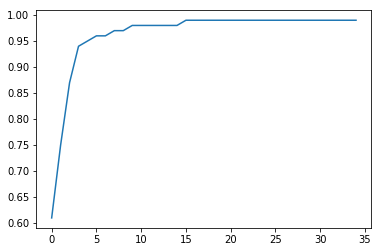

In [34]:
plt.plot(range(len(y2)), y2)
plt.savefig("fig6b.png")

In [35]:
# choose components y2Index that explain 90% of variance
pca = PCA(n_components=y2Index)
X= PrIn5b.iloc[:, :-3]
y=PrIn5b.iloc[:, -1]
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape, y.shape

((262, 2), (262,))

In [36]:
print (pca.components_)
print (X_pca)

[[ 3.00282752e-01  4.29651049e-01  2.44240836e-01 ...  9.32982881e-05
   6.45486773e-05  2.52351347e-03]
 [ 4.03875895e-01  5.84087873e-01 -9.54486341e-02 ...  7.42304464e-06
   3.47416657e-05  2.88953374e-04]]
[[ 1.12317841e+10 -2.50694529e+10]
 [ 5.18836889e+10  1.94770149e+10]
 [ 1.43106179e+10  1.80679965e+10]
 [ 4.40154487e+09  2.84155284e+09]
 [-2.83974915e+10  5.57891900e+10]
 [ 3.17654463e+10  8.67393187e+09]
 [-5.45948803e+10 -2.49340981e+10]
 [-3.79848215e+09  8.59886811e+10]
 [ 1.02966298e+11 -6.04833553e+10]
 [ 6.12834578e+09  5.10151078e+10]
 [ 8.61005985e+10 -5.76951719e+10]
 [-2.61945533e+10 -5.72912449e+09]
 [ 4.29410650e+10  1.94925801e+10]
 [ 2.47752466e+10  1.55713954e+11]
 [ 3.15505707e+10 -1.47973259e+10]
 [-4.00046744e+10 -4.07026880e+08]
 [-2.91990774e+10 -1.01924401e+11]
 [ 9.85700049e+09 -3.24810559e+10]
 [ 9.26318312e+10  8.76487870e+10]
 [-3.56176079e+10 -4.95256497e+10]
 [ 7.95936512e+10  1.18935922e+11]
 [ 1.18700773e+10  4.66398839e+10]
 [ 2.17342886e+10 -

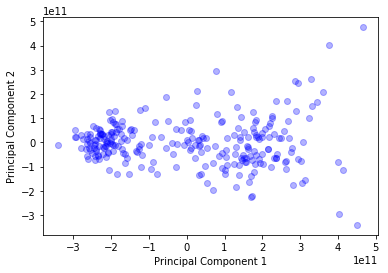

In [37]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = "b", alpha = 0.3)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("fig6")

In [39]:
import random
random.seed( 10 )
model = linearmodel(Xa = X_pca, y = y, engineer = False, scale = False)
print (model)

(array([2.26062111e-12, 1.78576668e-11]), 7.967876337978793, 0.048647863912337774)


## Try Support Vector Machine

In [40]:
y_svc =["nonAD"  if i <= 2 else "AD" for i in PrIn5b["CDR"]]
# print (x, len(x), len(PrIn4b["CDR"]))

In [41]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X_svc=PrIn5b.drop(["RunName", "CDR", "PlaqueMean"], axis=1)


lab_enc = LabelEncoder()
y_svc = lab_enc.fit_transform(y_svc)

X_svc_train, X_svc_test, y_svc_train, y_svc_test = train_test_split(X_svc, y_svc,  test_size=0.33, random_state=42)
print (X_svc_train.shape,  X_svc_test.shape, y_svc_train.shape, y_svc_test.shape)

print("Size of training set: {}   size of test set: {}".format(
      X_svc_train.shape[0], X_svc_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_svc_train, y_svc_train)
        # evaluate the SVC on the test set
        score = svm.score(X_svc_test, y_svc_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

(175, 1553) (87, 1553) (175,) (87,)
Size of training set: 175   size of test set: 87
Best score: 0.57
Best parameters: {'C': 0.001, 'gamma': 0.001}


In [42]:
X_svc_train2, X_svc_test2, y_svc_train2, y_svc_test2 = train_test_split(X_pca, y_svc,  test_size=0.33, random_state=42)
print (X_svc_train2.shape,  X_svc_test2.shape, y_svc_train2.shape, y_svc_test2.shape)

print("Size of training set: {}   size of test set: {}".format(
      X_svc_train2.shape[0], X_svc_test2.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_svc_train2, y_svc_train2)
        # evaluate the SVC on the test set
        score = svm.score(X_svc_test2, y_svc_test2)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

(175, 2) (87, 2) (175,) (87,)
Size of training set: 175   size of test set: 87
Best score: 0.57
Best parameters: {'C': 0.001, 'gamma': 0.001}


## Pipeline and Grisearch

In [43]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), RobustScaler(), MinMaxScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=10), RandomForestClassifier(n_estimators=100), 
                    RandomForestClassifier(n_estimators=1000)], 
     'preprocessing': [StandardScaler(), RobustScaler(), MinMaxScaler(), None],
     'classifier__max_features': [1, 2, 3]}, 
    {'classifier': [KMeans(n_clusters = 1), KMeans(n_clusters = 5), KMeans(n_clusters = 10)], 
     'preprocessing': [StandardScaler(), RobustScaler(), MinMaxScaler(), None]},
    {'classifier': [LogisticRegression()], 'preprocessing': [StandardScaler(), RobustScaler(), MinMaxScaler(), None]},
]


pipe = Pipeline([('preprocessing', None), 
                 ('classifier', LinearRegression())])


X_svc=PrIn5b.drop(["RunName", "CDR", "PlaqueMean"], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X_svc,y_svc, random_state=1)
# print (Xa_svc.shape, "\n"*5, y_svc)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X3_train, y3_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X3_test, y3_test)))

Best params:
{'classifier': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.72
Test-set score: 0.79


In [44]:
import pickle
with open('dataset.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump((PrIn4b, PrIn5b, param_grid, pipe, grid), f, pickle.HIGHEST_PROTOCOL)

In [45]:
X = (PrIn5b.iloc[:, :-3])
y_CDR = lab_enc.fit_transform(PrIn5b.iloc[:, -2])

X_train, X_test, y_train, y_test = train_test_split(X, y_CDR, test_size=0.33, random_state=45)
finaltest_model = LogisticRegression(solver ='newton-cg', multi_class="multinomial")
finaltest_model.fit(X_train, y_train)
finaltest_model.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


0.21839080459770116

In [46]:
X_final  = PrIn5b.iloc[:, :-3].apply(np.log10)
y_final  = y_svc

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.33, random_state=45)
final_model = LogisticRegression()
final_model.fit(X_train_final, y_train_final)
final_model.score(X_test_final, y_test_final)

0.7701149425287356

In [47]:
print (final_model.coef_)
print (final_model.intercept_)

[[ 0.22893672 -0.36355714  0.03956385 ... -0.3308243  -0.34193882
  -0.68876201]]
[-0.002361]


In [48]:
Coefficients = (final_model.coef_)
up =(Coefficients.mean(axis=1)  + 3*Coefficients.std(axis=1))
down = (Coefficients.mean(axis=1)  - 3*Coefficients.std(axis=1))
print (up, down)


[0.45417396] [-0.45566841]


In [49]:
index_of = np.where((Coefficients>up) | (Coefficients<down))[1]
print (X_final.columns[index_of])

print ([g for g in X_final.columns[index_of] if g in AD_genes2.index])


Index(['HAPLN2|Q9GZV7', 'SERPINA1|P01009', 'S100A13|Q99584', 'FABP3|S4R371',
       'OPALIN|Q96PE5-3', 'ALDH1A1|P00352', 'LHPP|Q9H008', 'VBP1|P61758',
       'FECH|P22830', 'PEPD|P12955', 'ANXA4|P09525', 'ARHGAP35|Q9NRY4',
       'TMX4|Q9H1E5', 'ILVBL|A1L0T0', 'ABETA|'],
      dtype='object')
['FECH|P22830', 'PEPD|P12955', 'ABETA|']


In [50]:
Final = pd.DataFrame(np.asarray(Coefficients[:, index_of]))
Final.columns = X_final.columns[index_of]
Final = Final.T

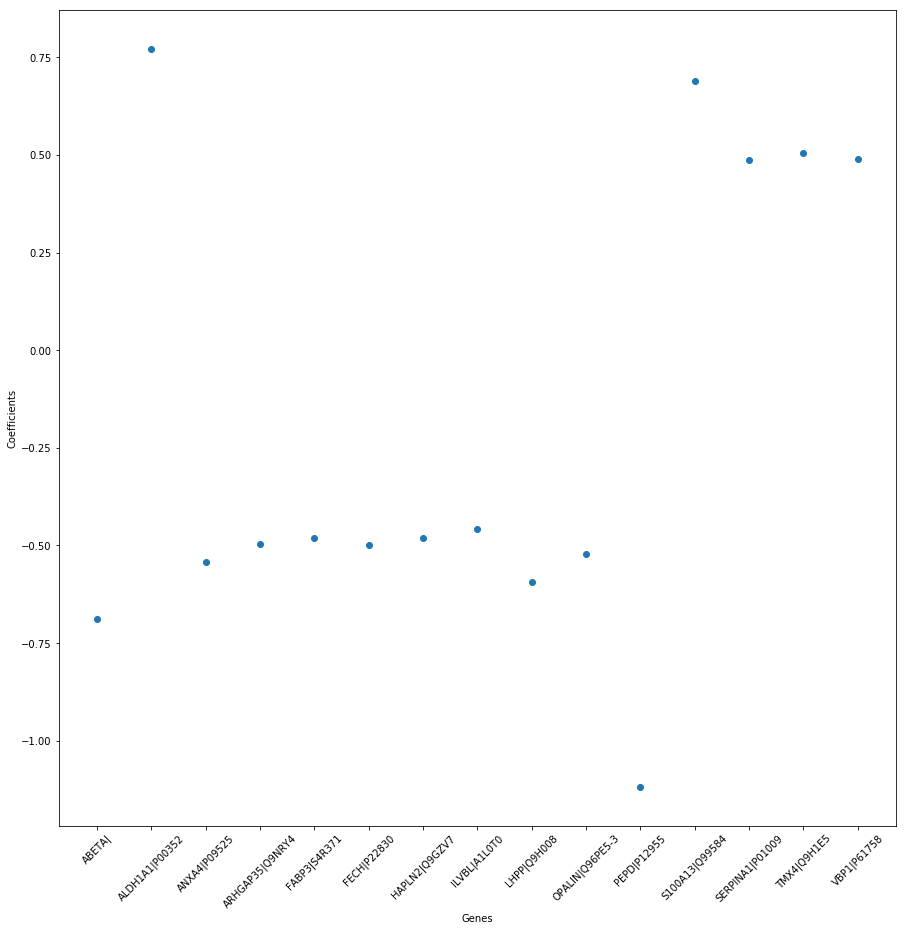

In [51]:
plt.figure(figsize = (15, 15))
plt.scatter(Final.index, Final)
plt.xticks (rotation =45)
plt.xlabel("Genes")
plt.ylabel("Coefficients")
plt.savefig("fig7.png")